In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import time

**Problem 1**: Numerically compute the integral  

$$ \int_1^5 \frac{1}{x^{3/2}} \, dx = 2 - \frac{2}{\sqrt{5}} \approx 1.105573 $$  

using Monte Carlo integration and compare to HW 1.

In [2]:
# -----------------------------------------------------
# HW 1
# -----------------------------------------------------

# Function to compute f(x_i) = x_i^(-1.5) for each x_i.
def function_values(start, stop, num_points):
    
    x_vals = np.linspace(start, stop, num=num_points)
    y_vals = np.ones(num_points) * np.power(x_vals, -1.5)
    
    return y_vals

# Function to numerically integrate using the rectangle rule.
def rectangle_rule(start, stop, num_points):
    
    dx = (stop - start) / (num_points - 1)              # Spacing between points.
    y_vals = function_values(start, stop, num_points)
    
    integral = dx * np.sum(y_vals[0:(num_points - 2)])  # Exclude last point (x_N = b).
    
    return integral

# Function to numerically integrate using the trapezoid rule.
def trapezoid_rule(start, stop, num_points):
    
    dx = (stop - start) / (num_points - 1)
    y_vals = function_values(start, stop, num_points)
    
    integral = (dx / 2.0) * (y_vals[0] + y_vals[num_points - 1] + 2.0 * np.sum(y_vals[1:(num_points - 1)]))
    
    return integral

# Function to compute the relative error.
def frac_err(int_exact, int_num):
    
    return abs(int_exact - int_num) / int_exact

**Monte Carlo Integration**:  

$$ I = \frac{b - a}{N} \sum_{i=1}^N w_i f(x_i), $$  

where $w_i = 1$ and $x_i$ are randomly drawn from a uniform distribution between $a$ and $b$.

In [3]:
# Function to compute f(x_i) = x_i^(-1.5) for each x_i.
def function_values_mc(x_vals):
    
    y_vals = np.ones(len(x_vals)) * np.power(x_vals, -1.5)
    
    return y_vals

# Function to numerically integrate using Monte Carlo integration.
def monte_carlo_integration(start, stop, num_points):
    
    # Draw x_i randomly from uniform distribution.
    x_vals = np.random.uniform(low=start, high=stop, size=num_points)
    y_vals = function_values_mc(x_vals)
    
    integral = ((stop - start) / (num_points - 1)) * np.sum(y_vals)
    
    return integral

In [4]:
# Integration limits.
a = 1.0
b = 5.0

# Exact integral.
I_exact = 0.4 * (5.0 - np.sqrt(5.0))

print('I_exact = {0:.10f}'.format(I_exact))

N_vals_r        = np.asarray([5, 10, 20, 50, 100, 200, 500, 800, 1000, 1200, 
                              1325, 1326, 
                              1500, 1800, 2000, 5000,
                              8000, 10000, 20000, 50000, 80000, 
                              100000, 120000, 
                              132363, 132364,
                              150000, 180000, 200000])
N_vals_t        = np.asarray([5, 10, 20, 
                              30, 43, 44,
                              50, 100, 200, 
                              422, 423,
                              500, 800, 1000, 1200, 
                              1500, 2000, 5000, 8000, 10000])
N_vals_m        = np.asarray([5, 10, 20, 50, 100, 200, 500, 800, 1000, 1200, 
                              1500, 1800, 2000, 5000,
                              8000, 10000, 20000, 50000, 80000, 
                              100000, 120000, 150000, 180000, 200000])


frac_err_vals_r = np.zeros(len(N_vals_r))
frac_err_vals_t = np.zeros(len(N_vals_t))
frac_err_vals_m = np.zeros(len(N_vals_m))

print('\nRectangle rule:')
for i in range(len(N_vals_r)):
    
    I_num = rectangle_rule(a, b, N_vals_r[i])    
    frac_err_vals_r[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.10f}\tfrac_err = {2:.10f}'.format(N_vals_r[i], I_num, frac_err_vals_r[i]))
    
print('\nTrapezoid rule:')
for i in range(len(N_vals_t)):
    
    I_num = trapezoid_rule(a, b, N_vals_t[i])    
    frac_err_vals_t[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.10f}\tfrac_err = {2:.10f}'.format(N_vals_t[i], I_num, frac_err_vals_t[i]))
    
print('\nMonte Carlo:')
for i in range(len(N_vals_m)):
    
    I_num = monte_carlo_integration(a, b, N_vals_m[i])    
    frac_err_vals_m[i] = frac_err(I_exact, I_num)
    
    print('N = {0:<6d}\tI_num = {1:.10f}\tfrac_err = {2:.10f}'.format(N_vals_m[i], I_num, frac_err_vals_m[i]))

I_exact = 1.1055728090

Rectangle rule:
N = 5     	I_num = 1.5460034803	frac_err = 0.3983732846
N = 10    	I_num = 1.2858164811	frac_err = 0.1630319330
N = 20    	I_num = 1.1867419773	frac_err = 0.0734182024
N = 50    	I_num = 1.1360717145	frac_err = 0.0275865191
N = 100   	I_num = 1.1205101694	frac_err = 0.0135109694
N = 200   	I_num = 1.1129649962	frac_err = 0.0066862961
N = 500   	I_num = 1.1085115222	frac_err = 0.0026580910
N = 800   	I_num = 1.1074066814	frac_err = 0.0016587531
N = 1000  	I_num = 1.1070391550	frac_err = 0.0013263224
N = 1200  	I_num = 1.1067943466	frac_err = 0.0011048911
N = 1325  	I_num = 1.1066789289	frac_err = 0.0010004948
N = 1326  	I_num = 1.1066780934	frac_err = 0.0009997391
N = 1500  	I_num = 1.1065497052	frac_err = 0.0008836109
N = 1800  	I_num = 1.1063867038	frac_err = 0.0007361748
N = 2000  	I_num = 1.1063052309	frac_err = 0.0006624818
N = 5000  	I_num = 1.1058655977	frac_err = 0.0002648299
N = 8000  	I_num = 1.1057557738	frac_err = 0.0001654932
N = 1000

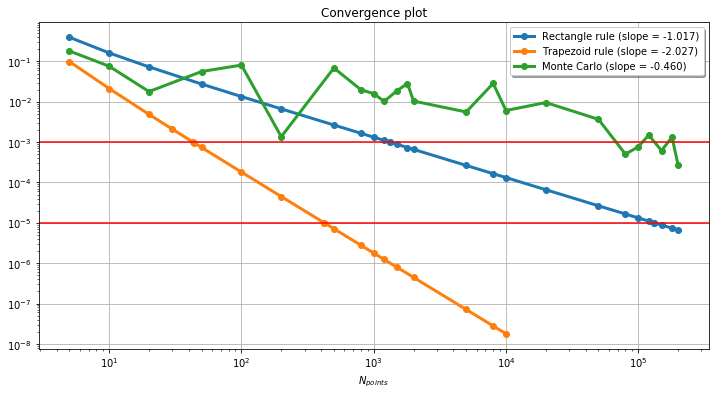

In [5]:
# Convergence plots
fit_r = np.polyfit(np.log10(N_vals_r), np.log10(frac_err_vals_r), 1)
fit_t = np.polyfit(np.log10(N_vals_t), np.log10(frac_err_vals_t), 1)
fit_m = np.polyfit(np.log10(N_vals_m), np.log10(frac_err_vals_m), 1)

label_r = "Rectangle rule (slope = {0:.3f})".format(fit_r[0])
label_t = "Trapezoid rule (slope = {0:.3f})".format(fit_t[0])
label_m = "Monte Carlo (slope = {0:.3f})".format(fit_m[0])

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(N_vals_r, frac_err_vals_r, '-o', label=label_r, linewidth=3)
plt.plot(N_vals_t, frac_err_vals_t, '-o', label=label_t, linewidth=3)
plt.plot(N_vals_m, frac_err_vals_m, '-o', label=label_m, linewidth=3)

# Plot horizontal lines where fractional error is 1.0e-3, 1.0e-5.
plt.axhline(y=1.0e-3, color='r', linestyle='-')
plt.axhline(y=1.0e-5, color='r', linestyle='-')

plt.grid(True)
plt.xlabel('$N_{points}$')
plt.title('Convergence plot')
plt.xscale('log')
plt.yscale('log')
plt.legend(shadow=True)
plt.show()

**Problem 2**: Use your own random number generator to complete a Monte Carlo simulation to determine how long
it takes a photon to escape from the center of a (2D) sun.  

Mean free path: $\ell = 4 \times 10^{-1}$ cm; solar radius: $6.95700 \times 10^{10}$ cm.  

Every time after a photon hits an electron after traveling one mean free path, it is scattered in some arbitrary 
direction, $\theta$.

In [6]:
# Generate random integer between zero and m - 1.
# a=1664525, c=1013904223, m=4294967296
def rng_integer(seed, a, c, m):  
    return (a * seed + c) % m

In [7]:
# Advance by single mean free path in direction given by theta.
def step(r0, theta0, r1, theta1):
    
    x0 = r0 * np.cos(theta0); y0 = r0 * np.sin(theta0)
    x1 = r1 * np.cos(theta1); y1 = r1 * np.sin(theta1)
    
    x = x0 + x1; y = y0 + y1
    
    r = np.sqrt(x**2 + y**2)
    
    # Theta in [-pi, pi]
    if y >= 0:
        theta = np.arccos(x/r)
    else:
        theta = -np.arccos(x/r)
        
    return r, theta

In [8]:
def plot_rw(r_vals, theta_vals, rn_theta_vals, r_sun, t_final, n_bins):
    
    N_steps = len(r_vals)
    
    x_vals = np.multiply(r_vals, np.cos(theta_vals))
    y_vals = np.multiply(r_vals, np.sin(theta_vals))
    
    fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=(16.0, 16.0))

    # Plot random walk.
    axs[0][0].plot(x_vals, y_vals, linestyle='-')
    
    circle = plt.Circle((0, 0), r_sun, color='k', fill=False)
    axs[0][0].add_patch(circle)

    # Plot r as a function of step.
    axs[1][0].plot(np.linspace(0, N_steps, num=N_steps), r_vals)

    # Plot histogram of randomly-generated theta values.
    axs[1][1].hist(rn_theta_vals, bins=n_bins)

    axs[0][0].set_xlim([-r_sun, r_sun]);    axs[0][0].set_ylim([-r_sun, r_sun])

    axs[0][0].set_xlabel('x [cm]', fontsize='x-large'); axs[0][0].set_ylabel('y [cm]', fontsize='x-large')
    axs[1][0].set_xlabel('step', fontsize='x-large');   axs[1][0].set_ylabel('r [cm]', fontsize='x-large')
    axs[1][1].set_xlabel(r"$\theta$ [rad]", fontsize='x-large')
    axs[1][1].set_ylabel('Number', fontsize='x-large')

    axs[0][0].set_title('Monte Carlo photon random walk.', fontsize='x-large')
    axs[1][0].set_title('Radial distance at current step.', fontsize='x-large')
    axs[1][1].set_title(r"Histogram of randomly-generated $\theta$", fontsize='x-large')

    axs[0][1].axis("off")
    
    txt_1 = '{0:d} steps'.format(N_steps - 1)
    
    axs[0][0].annotate(txt_1, xy=(0.02, 0.95), xytext=(0.02, 0.95), xycoords='axes fraction', fontsize='x-large')

    plt.show()

In [9]:
# Function for performing Monte Carlo random walk until r > r_sun.
def monte_carlo_rw(r_sun, mfp, seed, n_bins=20, use_default=False, verbose=False, make_plots=True):
    
    # Coefficients for random integer generator.
    a = 1664525; c = 1013904223; m = 4294967296
    
    # Track total number of steps / time elapsed.
    N_steps = 0; t_total = 0.0
    
    # Start at center of the Sun; store r, theta, and randomly-generated theta at each step.
    r = 0.0; theta = 0.0
    
    r_list = [r]; theta_list = [theta]; rn_theta_list = []

    # Time code execution.
    t1 = time.time()
    while True:
        
        # Use numpy random number generator.
        if use_default:
            rn_theta = (2 * np.pi) * np.random.uniform() - np.pi
        
        # Else generate random integer between 0 and m - 1; convert to theta value; update seed for rng.
        else:
            rn_int   = rng_integer(seed, a, c, m)
            rn_theta = (2 * np.pi) * (float(rn_int) / float(m - 1)) - np.pi
            seed     = rn_int                                     
    
        # Advance by one step; update r, theta and store new values.
        r_new, theta_new = step(r, theta, mfp, rn_theta)
        r_list.append(r_new); theta_list.append(theta_new); rn_theta_list.append(rn_theta)
        r = r_new; theta = theta_new
    
        # Update current step.
        N_steps += 1
    
        # Exit condition.
        if r >= r_sun:
            if verbose:
                print('Escaped (N_steps = {0:d})'.format(N_steps))
            break
    
    t2 = time.time()
    t_total = (t2 - t1)
    
    if verbose:
        print('Elapsed time: {0:.8f} [s]'.format(t_total))
            
    r_vals        = np.asarray(r_list)
    theta_vals    = np.asarray(theta_list)
    rn_theta_vals = np.asarray(rn_theta_list)
    
    if make_plots:
        plot_rw(r_vals, theta_vals, rn_theta_vals, r_sun, t_total, n_bins=n_bins)
    
    return t_total, N_steps

Initial seed: 2449570430


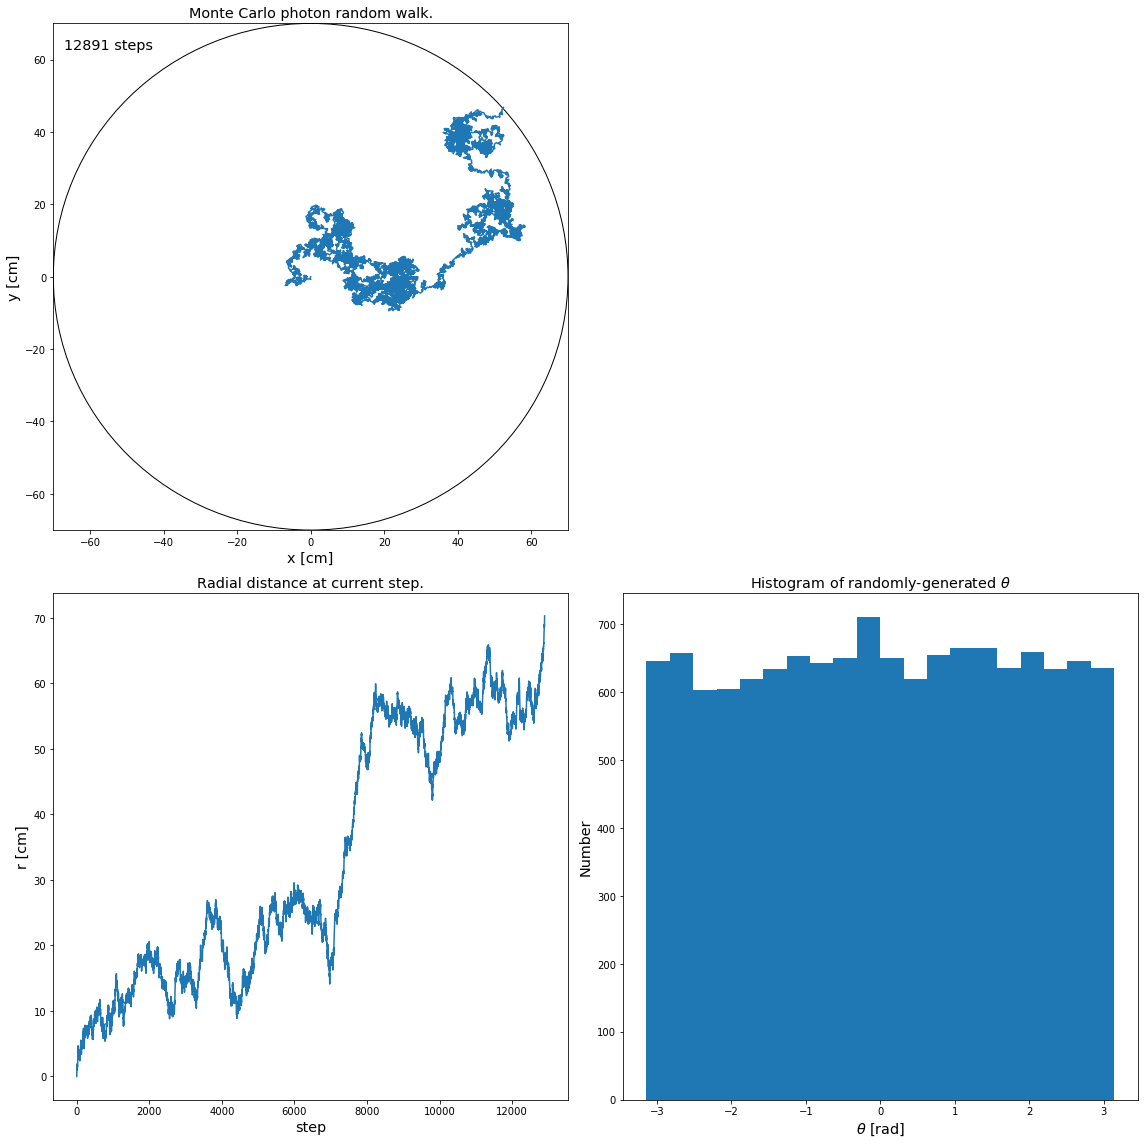

Initial seed: 937168977


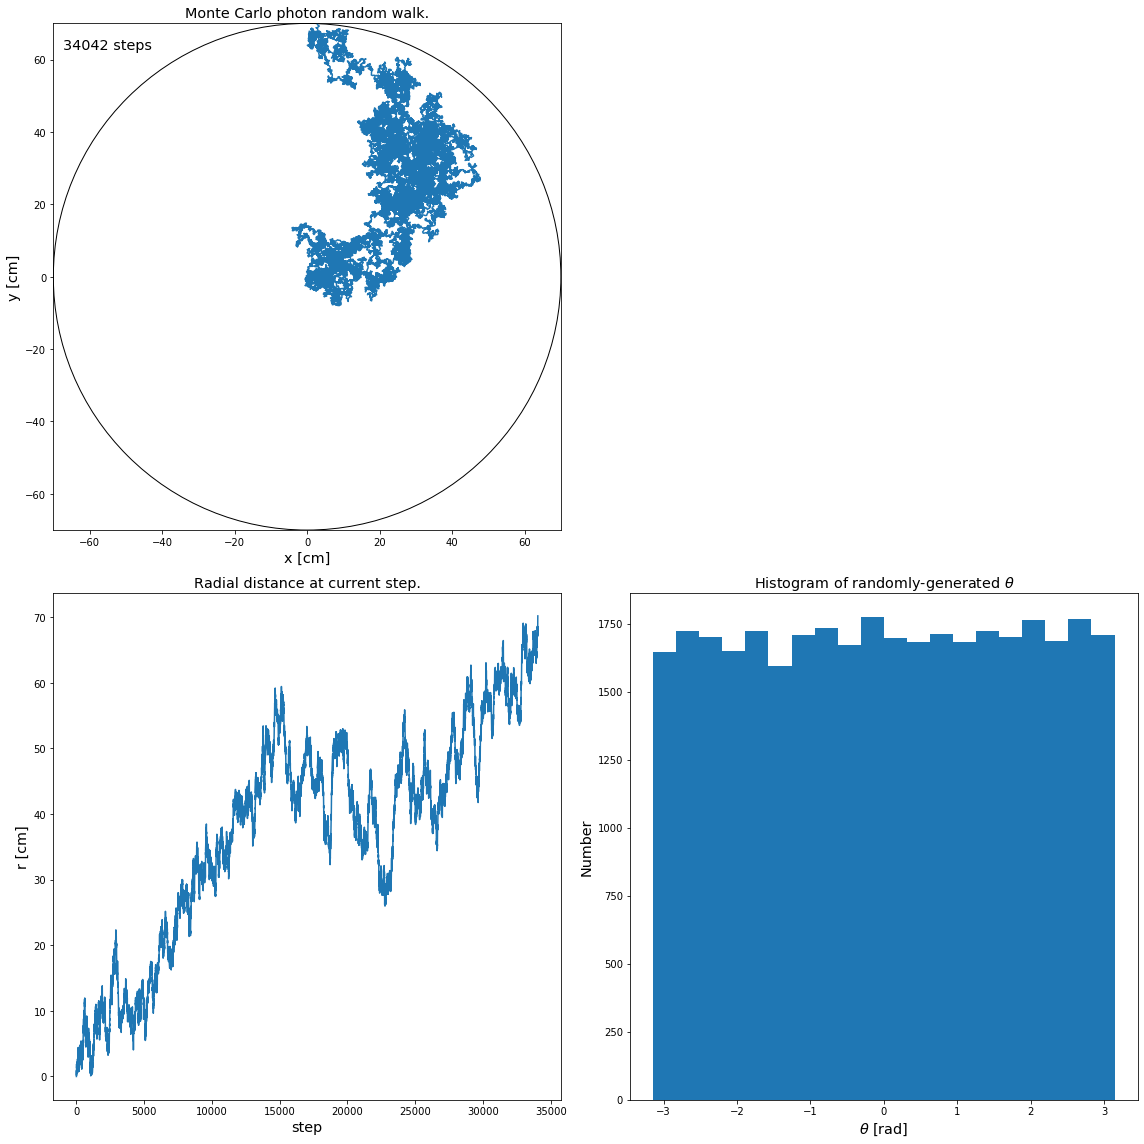

Initial seed: 287439347


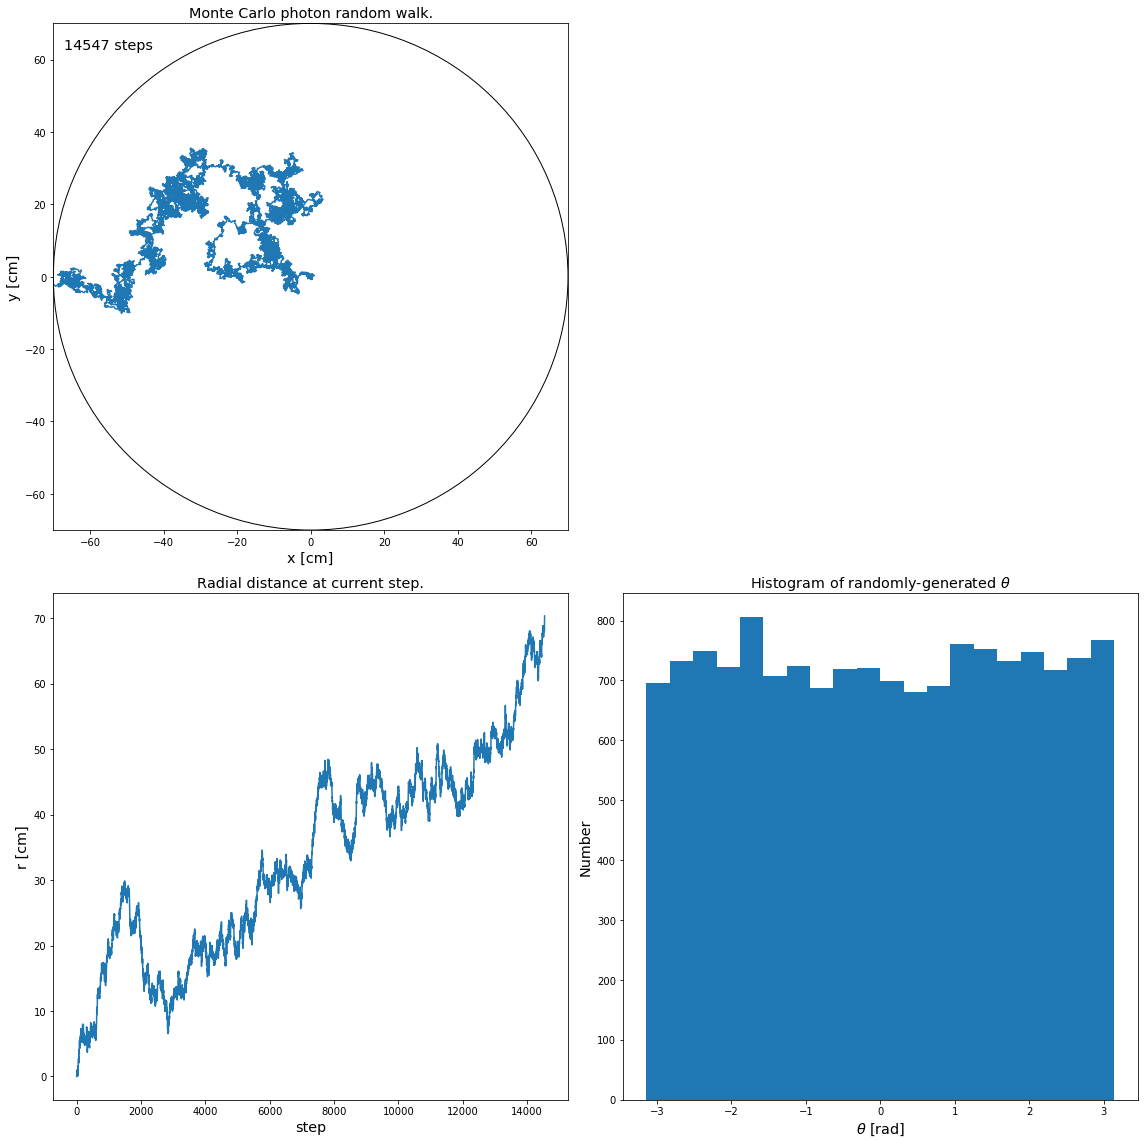

Initial seed: 2716775667


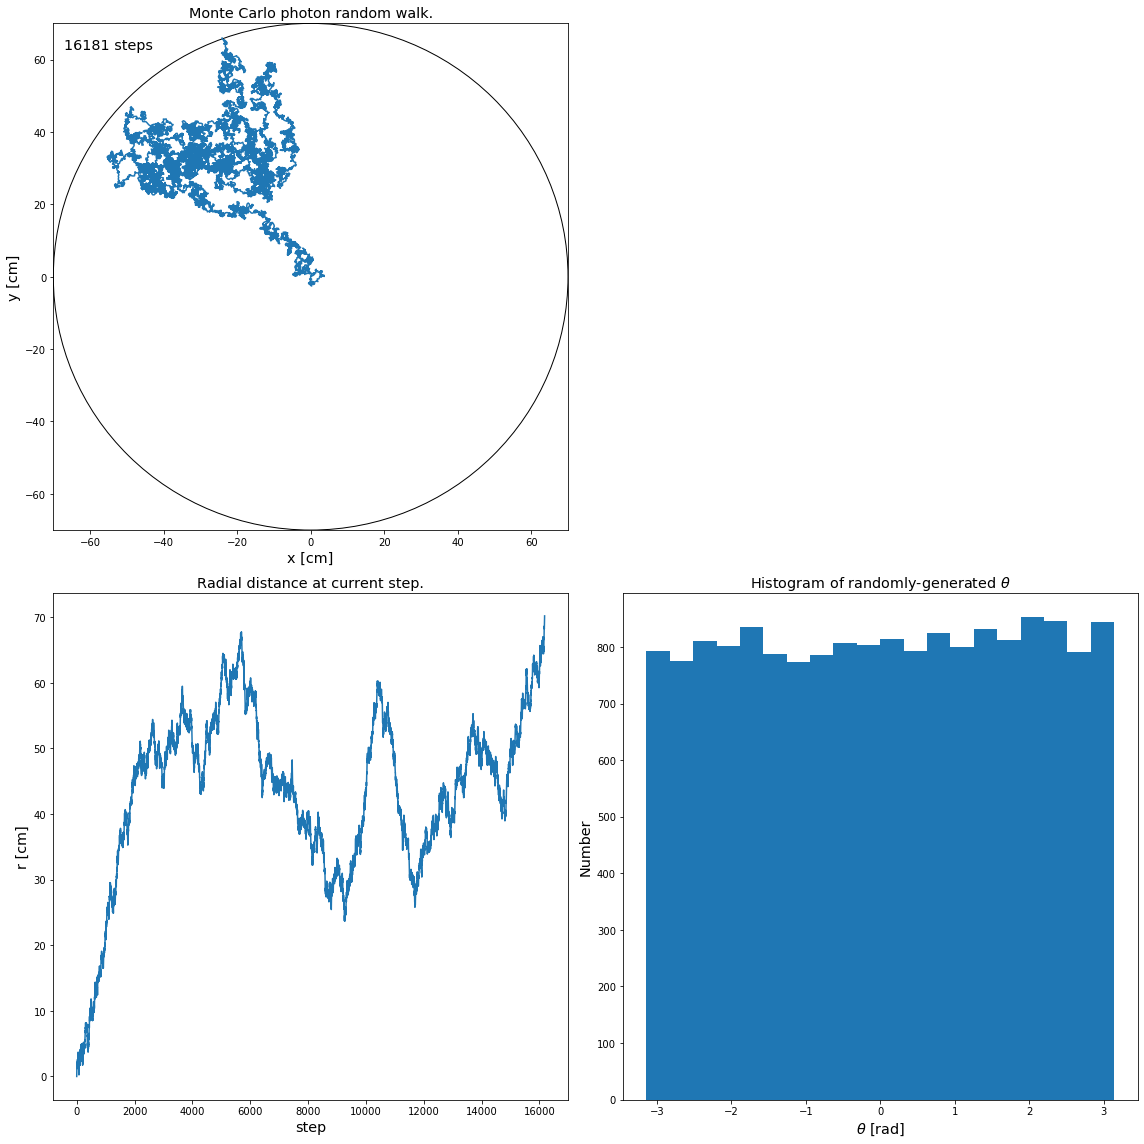

Initial seed: 2431320765


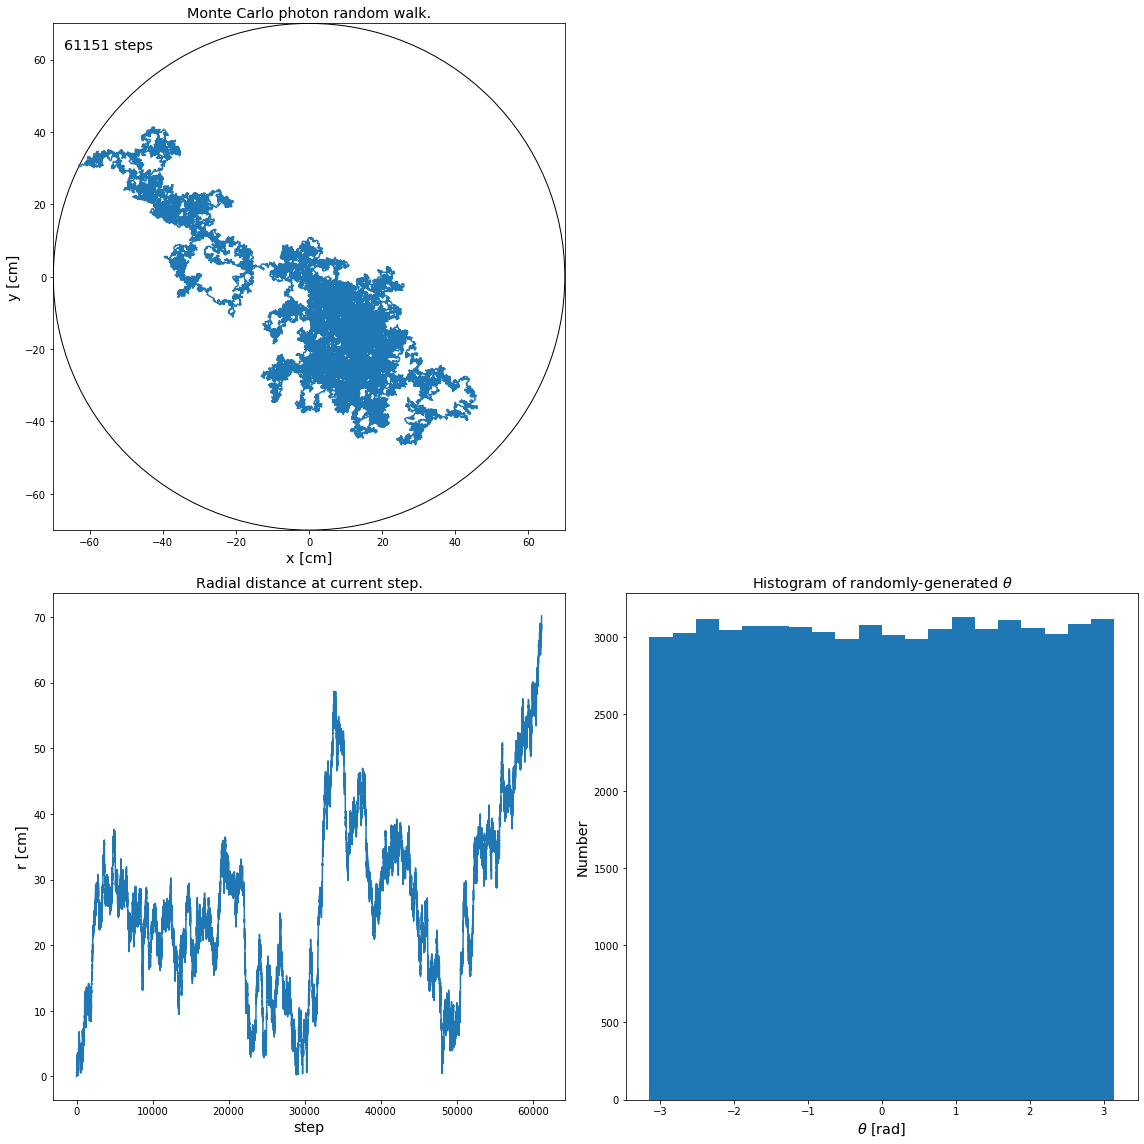

In [10]:
# Plots showing 5 different random walks for r_sun = 70.0 cm.
r_sun = 70.0  # cm
mfp   = 0.4   # cm

m = 4294967296
N_samples = 5
seeds = np.random.randint(0, high=m, size=N_samples)

for seed in seeds:
    print('Initial seed: {0:d}'.format(seed))
    t_f, N_f = monte_carlo_rw(r_sun, mfp, seed)

In [11]:
def vary_rsun(r_sun, N_samples=50):
    mfp   = 0.4   # cm
    
    # Average results over N_samples values of initial seeds.
    seeds = np.random.randint(0, high=m, size=N_samples)
    
    # Track number of steps / time required to escape the Sun.
    t_list = []; N_list = []

    for seed in seeds:
        #print('Initial seed: {0:d}'.format(seed))
        t_f, N_f = monte_carlo_rw(r_sun, mfp, seed, verbose=False, make_plots=False)
    
        t_list.append(t_f)
        N_list.append(N_f)
    
    N_min = np.min(N_list); N_max = np.max(N_list); N_ave = np.mean(N_list); N_std = np.std(N_list)
    t_min = np.min(t_list); t_max = np.max(t_list); t_ave = np.mean(t_list); t_std = np.std(t_list)  

    print('\nNumber of steps: {0:.3e} +/- {1:.3e}   [min: {2:d}, max: {3:d}]'.format(N_ave, N_std, N_min, N_max))
    print('Elapsed time:    {0:.3e} +/- {1:.3e} s [min: {2:.3e}, max: {3:.3e}]'.format(t_ave, t_std, t_min, t_max))
    
    return N_ave, N_std, t_ave, t_std

In [12]:
# R = 7.0 cm
N_ave1, N_std1, t_ave1, t_std1 = vary_rsun(7.0, N_samples=20)


Number of steps: 3.681e+02 +/- 2.147e+02   [min: 141, max: 931]
Elapsed time:    3.633e-03 +/- 2.106e-03 s [min: 1.402e-03, max: 9.292e-03]


In [13]:
# R = 70.0 cm
N_ave2, N_std2, t_ave2, t_std2 = vary_rsun(70.0, N_samples=20)


Number of steps: 2.564e+04 +/- 1.742e+04   [min: 6873, max: 72208]
Elapsed time:    2.476e-01 +/- 1.689e-01 s [min: 6.719e-02, max: 6.951e-01]


In [14]:
# R = 700.0 cm
N_ave3, N_std3, t_ave3, t_std3 = vary_rsun(700.0, N_samples=20)


Number of steps: 3.245e+06 +/- 1.381e+06   [min: 1281113, max: 7519292]
Elapsed time:    3.312e+01 +/- 1.383e+01 s [min: 1.346e+01, max: 7.541e+01]


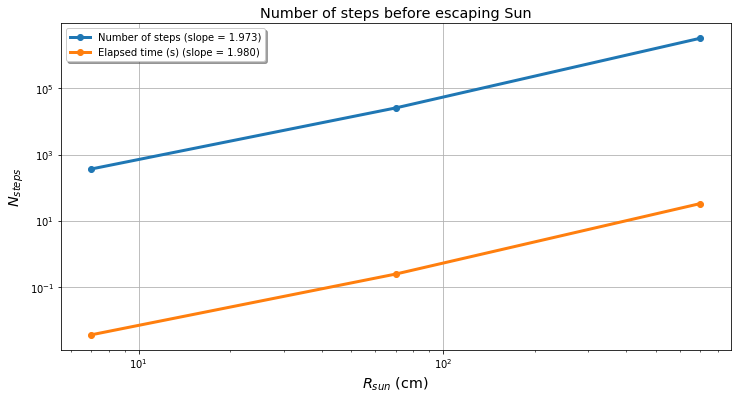

In [15]:
r_sun_vals = np.asarray([7.0, 70.0, 700.0])
N_vals = np.asarray([N_ave1, N_ave2, N_ave3])
t_vals = np.asarray([t_ave1, t_ave2, t_ave3])

fit_N = np.polyfit(np.log10(r_sun_vals), np.log10(N_vals), 1)
fit_t = np.polyfit(np.log10(r_sun_vals), np.log10(t_vals), 1)

label_N = "Number of steps (slope = {0:.3f})".format(fit_N[0])
label_t = "Elapsed time (s) (slope = {0:.3f})".format(fit_t[0])

plt.rcParams["figure.figsize"] = (12,6)

plt.plot(r_sun_vals, N_vals, '-o', label=label_N, linewidth=3)
plt.plot(r_sun_vals, t_vals, '-o', label=label_t, linewidth=3)

plt.grid(True)
plt.xlabel('$R_{sun}$ (cm)', fontsize='x-large')
plt.ylabel('$N_{steps}$', fontsize='x-large')
plt.title('Number of steps before escaping Sun', fontsize='x-large')
plt.xscale('log')
plt.yscale('log')
plt.legend(shadow=True)
plt.show()

$N$ seems to be proportional to $r^2$, or $r \propto \sqrt{N}$.  

$$ \frac{R_{sun}}{R_{700 cm}} = \sqrt{\frac{N_{sun}}{N_{700 cm}}} \quad \longrightarrow \quad
N_{sun} = N_{700 cm} \left( \frac{R_{sun}}{R_{700 cm}} \right)^2 
\sim 10^6 \times \left(\frac{10^{10}}{10^2}\right)^2 \sim 10^{22} \; \text{steps}$$